# 0. Повторение прошлого материала

In [ ]:
import pandas as pd


DATA_URL = "https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"
data = pd.read_csv(DATA_URL)

# 1. Ансамблирование моделей

## 1.0 Откуда ноги растут

В 1907 году Фрэнсис Гальтон (двоюродный брат Чарльза Дарвина, эрудит, создатель метода идентификации отпечатков пальцев, метеоролог и автор термина «евгеника») написал письмо в престижный научный журнал Nature о своем посещении выставки животноводства и птицеводства в Плимуте. Там он увидел необычный конкурс: участникам, заплатившим по 6 пенсов, предлагалось угадать вес выставленного напоказ большого откормленного быка, после того как его забьют и освежуют. По окончании конкурса ученый взял 787 заполненных билетов и выбрал из них в качестве среднего значения 1207 фунтов (547 килограммов). «Любая иная оценка рассматривалась большинством голосовавших как слишком высокая или слишком низкая», — пояснил он. Реальный вес животного составил 1198 фунтов (543 килограмма), что оказалось на удивление близко к выбранному числу 17. Гальтон назвал свое письмо Vox Populi («Глас народа»), хотя сегодня такой процесс принятия решений более известен как мудрость толпы.

### Теорема Кондорсе о присяжных

![](https://habrastorage.org/getpro/habr/formulas/94c/109/33e/94c10933eb8a4fa97f7945e764ab8ae0.svg)

$\large N $ — количество присяжных (присяжные **независимы** )  
$\large p $ — вероятность правильного решения присяжного  
$\large \mu $ — вероятность правильного решения всего жюри  
$\large m $ — минимальное большинство членов жюри, $m = \text{floor}(N/2) + 1 $  
$ \large C_N^i $ — число сочетаний из $N$ по $i$  

![](https://neerc.ifmo.ru/wiki/images/thumb/b/b4/%D0%92%D0%B8%D0%B4%D1%8B_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B9_2.png/675px-%D0%92%D0%B8%D0%B4%D1%8B_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B9_2.png)

## 1.1 Виды ансамблирования

![](https://cdn.corporatefinanceinstitute.com/assets/ensemble-methods.png)

# 2. Виды ансамблирования подробнее

## 2.1 Бэггинг

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bagging.PNG)

#### Случайный лес - пример бэггинга

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

#### Нарезание пространства данных

![](https://drek4537l1klr.cloudfront.net/kunapuli/v-1/Figures/02image012.jpg)

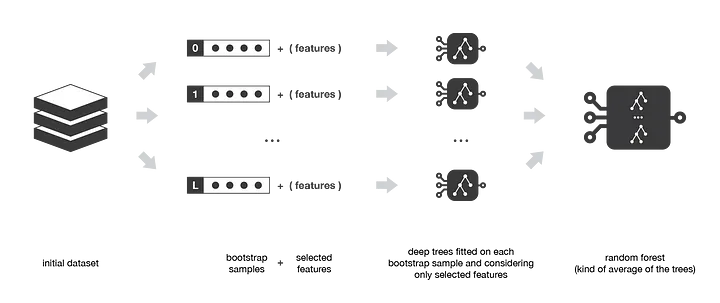

### Data Preprocessing

In [ ]:
data["Legendary"] = data["Legendary"].astype(int)
data.drop(["Name", '#'], axis=1, inplace=True)

In [ ]:
data_cat = data.select_dtypes("object")

In [ ]:
data = data.drop(data_cat.columns, axis=1).join(pd.get_dummies(data_cat))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, y = data.drop("Legendary", axis=1), data['Legendary']

### Model Fitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

In [ ]:
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

## 2.2. Стэкинг

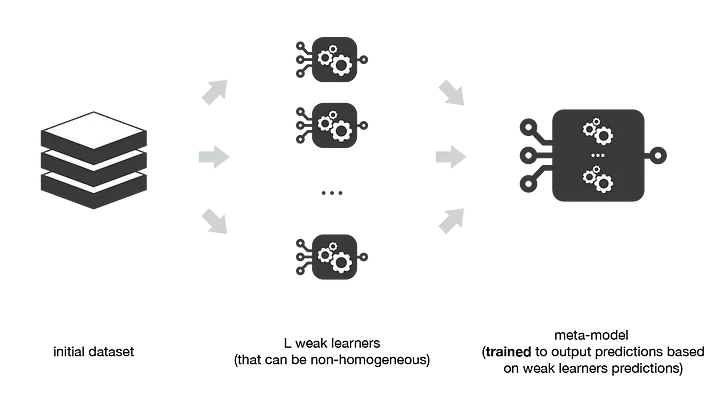

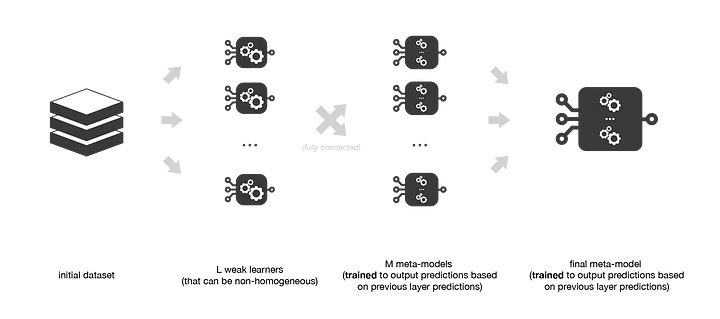

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


estimators = [
    ("lr", LogisticRegression()), 
    ("SVM", SVC()), 
    ("tree", DecisionTreeClassifier())
]
stack_model = StackingClassifier(estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)

In [ ]:
y_test_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

## 2.3 Бустинг

![](https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg)

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780128177365000090-f09-18-9780128177365.jpg)

Проще всего понять бустинг можно на примере, так что давайте начнем с него

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


X, y = make_regression(n_samples=10, n_features=1)
plt.plot(X, y);

In [ ]:
data = pd.DataFrame(X, columns=['feature'])
data['target'] = y
data.sort_values(by=['feature'], inplace=True)
data

### Шаг 0. Предсказываем среднюю величину целевой переменной

In [ ]:
y_pred = data['target'].mean()
data['predict_0'] = y_pred

plt.plot(data['feature'], data['target'], label='true')
plt.plot(data['feature'], data['predict_0'], label='prediction')
plt.title("Prediction 0 step")
plt.legend();

Посчитаем, насколько наш базовый предсказатель ошибается относительно истинных меток класса

In [ ]:
data['residual_0'] = data['target'] - data['predict_0']
data

`residual` показывает, насколько необходимо изменить предсказание базового предположения, чтобы получились корректные предсказания  
давайте обучим решающий пенёк предсказывать именно этот `residual`

### Шаг 1. Обучение первого дерева на ошибках глупенького классификатора

In [ ]:
from sklearn.tree import DecisionTreeRegressor


lr = 0.1  # learning rate - размер шага

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data[['feature']], data[['residual_0']])

data['tree_predict_1'] = tree.predict(data[['feature']])
data['predict_1'] = data['predict_0'] + lr * data['tree_predict_1']

In [ ]:
data

In [ ]:
plt.plot(data['feature'], data['target'], label='true')
plt.plot(data['feature'], data['predict_1'], label='prediction')
plt.title("Prediction 1 step")
plt.legend();

### Шаг 2. Обучение первого дерева на ошибках первого дерева + глупенького классификатора

In [ ]:
data['residual_1'] = data['target'] - data['predict_1']
data

In [ ]:
lr = 0.1  # learning rate - размер шага

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data[['feature']], data[['residual_1']])

data['tree_predict_2'] = tree.predict(data[['feature']])
data['predict_2'] = data['predict_1'] + lr * data['tree_predict_2']

In [ ]:
plt.plot(data['feature'], data['target'], label='true')
plt.plot(data['feature'], data['predict_2'], label='prediction')
plt.title("Prediction 2 step")
plt.legend();

In [ ]:
data['residual_2'] = data['target'] - data['predict_2']
data

In [ ]:
lr = 0.1  # learning rate - размер шага

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data[['feature']], data[['residual_2']])

data['tree_predict_3'] = tree.predict(data[['feature']])
data['predict_3'] = data['predict_2'] + lr * data['tree_predict_3']

In [ ]:
plt.plot(data['feature'], data['target'], label='true')
plt.plot(data['feature'], data['predict_3'], label='prediction')
plt.title("Prediction 3 step")
plt.legend();

### Напишем +- красивый и понятный цикл

In [ ]:
from sklearn.metrics import mean_absolute_error
from IPython.display import clear_output
from time import sleep


data = pd.DataFrame(X, columns=['feature'])
data['target'] = y
data.sort_values(by=['feature'], inplace=True)
data['predict'] = data['target'].mean()

lr = 0.1
n_epochs = 40
history = []
for i in range(n_epochs):
    clear_output(True)
    
    data['residual'] = data['target'] - data['predict']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(data[['feature']], data[['residual']])

    data['tree_predict'] = tree.predict(data[['feature']])
    data['predict'] = data['predict'] + lr * data['tree_predict']
    
    # metrics
    mae = mean_absolute_error(data['target'], data['predict'])
    history.append(mae)
    
    # plotting
    fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
    axes[0].plot(data['feature'], data['target'], label='true', marker='o')
    axes[0].plot(data['feature'], data['predict'], label='prediction', marker='o')
    axes[0].set_title(f"Prediction {i} step")
    axes[0].legend()
    
    axes[1].plot(history, label='MAE')
    axes[1].set_title(f"MAE history")
    axes[1].legend()
    
    plt.show()

In [ ]:
def make_boosting(data, feature_col, target_col, predict_col, n_epochs=100, learning_rate=0.1, verbose=True):
    history = []
    for i in range(n_epochs):
        data['residual'] = data[target_col] - data[predict_col]
        tree = DecisionTreeRegressor(max_depth=1)
        tree.fit(data[[feature_col]], data[['residual']])

        data['tree_predict'] = tree.predict(data[[feature_col]])
        data[predict_col] = data[predict_col] + learning_rate * data['tree_predict']

        # metrics
        mae = mean_absolute_error(data[target_col], data[predict_col])
        history.append(mae)

        if verbose:
            clear_output(True)
            fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
            axes[0].plot(data[feature_col], data[target_col], label='true', marker='o')
            axes[0].plot(data[feature_col], data[predict_col], label='prediction', marker='o')
            axes[0].set_title(f"Prediction {i} step")
            axes[0].legend()

            axes[1].plot(history, label='MAE')
            axes[1].set_title(f"MAE history")
            axes[1].legend()

            plt.show()

In [ ]:
import numpy as np


X = np.arange(-10, 10, 0.1).reshape(-1, 1)
y = np.sin(X)
data = pd.DataFrame(np.hstack([X, y]), columns=['feature', 'target'])
data['predict'] = data['target'].mean()
make_boosting(data, 'feature', 'target', 'predict', learning_rate=0.8)

### Еще одна интуиция 
![](https://explained.ai/gradient-boosting/images/golf-MSE.png)

### Теперь математика

![](https://explained.ai/gradient-boosting/images/latex-CB3574D4B05979222377D8458B38FCF4.svg)

## Какие есть варианты бустинга?
1. Sklearn Gradient Boosting  
2. XGBoosting
3. LightGBM
4. CatBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_test_pred = gbm.predict(X_test)
print(classification_report(y_test, y_test_pred))

## Бустинг классный, но есть ли минусы?
![](https://www.meme-arsenal.com/memes/15c7bccfc249ab8564a62efcd01261ae.jpg)

## Основная проблема - подбор гиперпараметров бустинга
## Как можем решать?
Решение - поиск по сетке в том или ином виде

![](https://www.researchgate.net/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid = {
    "learning_rate": [0.01, 0.001, 0.0001], 
    "n_estimators": [10, 50, 100],
}
gbm = GradientBoostingClassifier()
grid = GridSearchCV(gbm, param_grid, verbose=True)
grid.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, grid.predict(X_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid = {
    "learning_rate": [0.01, 0.001, 0.0001, 0.1], 
    "n_estimators": [10, 50, 100, 200, 300, 400, 500],
}
gbm = GradientBoostingClassifier()
grid = RandomizedSearchCV(gbm, param_grid, verbose=True, n_iter=10)
grid.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, grid.predict(X_test)))

## Лучше всего (как правило) работает байесовская оптимизация

![](https://i.stack.imgur.com/PLvPY.gif)

Байесовскую оптимизацию можно брать в библиотеке hyperopt (http://hyperopt.github.io/hyperopt/ )   
Хорошие варианты бустинга:
- LightGBM (https://lightgbm.readthedocs.io/en/v3.3.2/)
- CatBoost (https://catboost.ai)
- XGBoost (https://xgboost.readthedocs.io/en/stable/)